In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Problem statement: To Predict the paitiant will get the heart attact or not?


In [33]:
# FP : Actual (heart-attact) predict (no-heart-attact)    
# FN : Actual (heart-attact) predict (no-heart-attact)      -Its More important to hanndel     Recall

In [34]:
df=pd.read_csv('heart.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Age

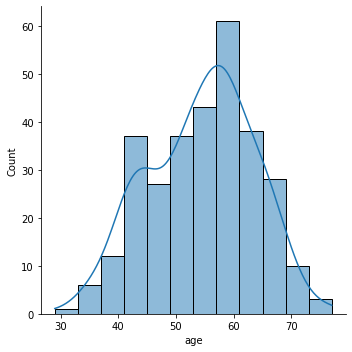

In [37]:
sns.displot(df['age'],kde=True)

<AxesSubplot:xlabel='age', ylabel='count'>

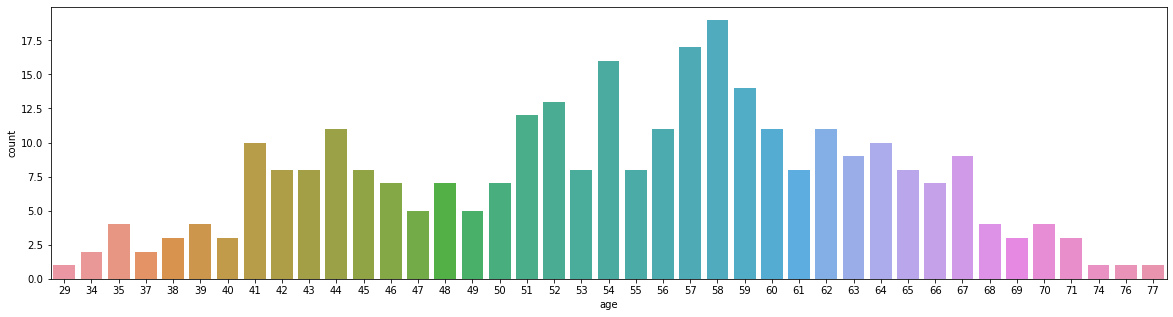

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['age'])

# SEX

<AxesSubplot:xlabel='sex', ylabel='count'>

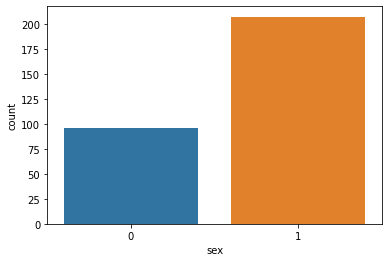

In [39]:
sns.countplot(df['sex'])

# Cp

<AxesSubplot:xlabel='cp', ylabel='count'>

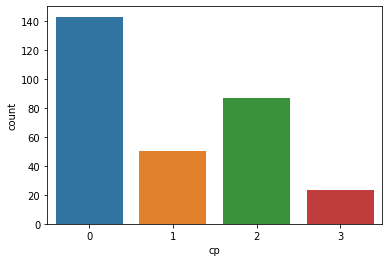

In [40]:
sns.countplot(df['cp'])

# trestbps

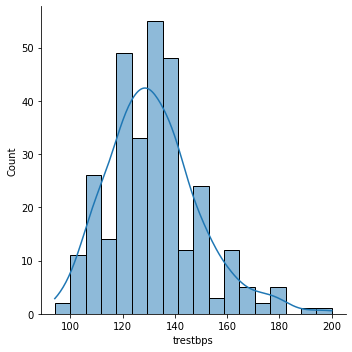

In [41]:
sns.displot(df['trestbps'],kde=True)

# chol

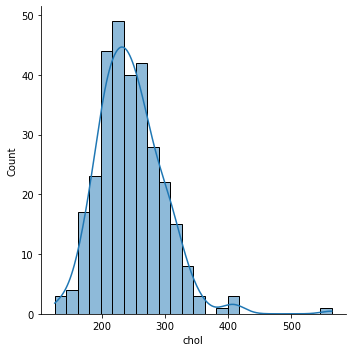

In [42]:
sns.displot(df['chol'],kde=True)

# fbs

<AxesSubplot:xlabel='fbs', ylabel='count'>

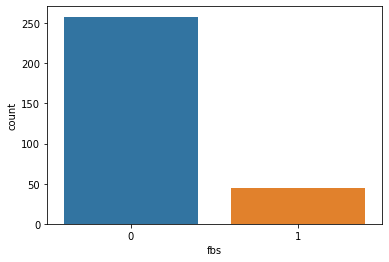

In [43]:
sns.countplot(df['fbs'])

# restecg

<AxesSubplot:xlabel='restecg', ylabel='count'>

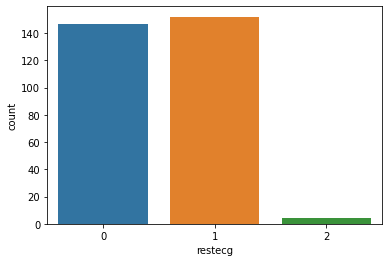

In [44]:
sns.countplot(df['restecg'])

# thalach

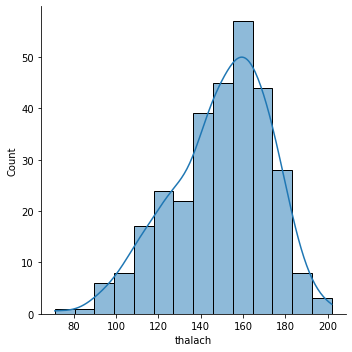

In [45]:
sns.displot(df['thalach'],kde=True)

# exang

<AxesSubplot:xlabel='exang', ylabel='count'>

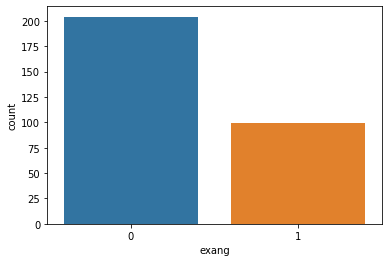

In [46]:
sns.countplot(df['exang'])

# oldpeak

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

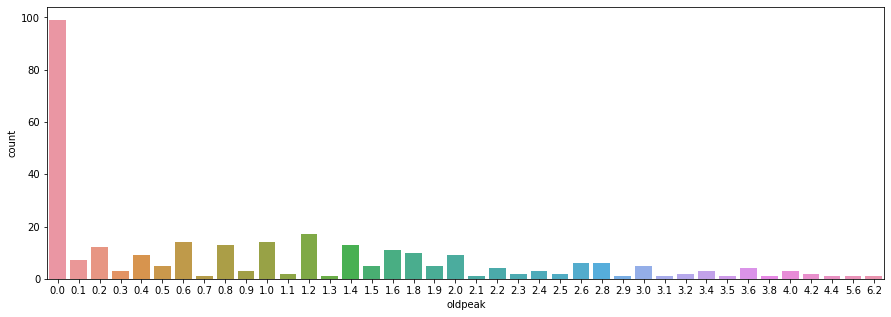

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(df['oldpeak'])

# slope     

<AxesSubplot:xlabel='slope', ylabel='count'>

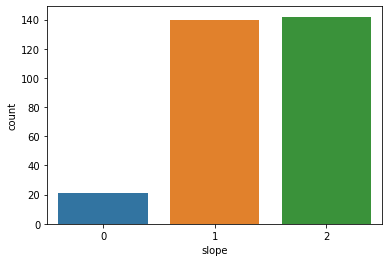

In [48]:
sns.countplot(df['slope'])

# ca

<AxesSubplot:xlabel='ca', ylabel='count'>

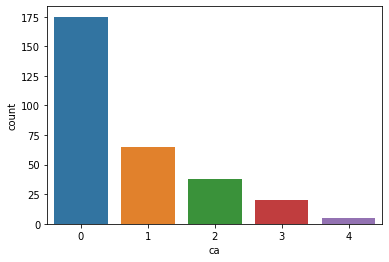

In [49]:
sns.countplot(df['ca'])

# thal

<AxesSubplot:xlabel='thal', ylabel='count'>

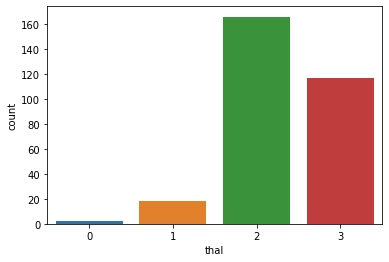

In [50]:
sns.countplot(df['thal'])

In [51]:
x=df.drop('target',axis=1)
y=df['target']

In [52]:
x.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


# Modeling - itreation 1

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)


In [55]:
model_DT=DecisionTreeClassifier()
model_DT.fit(x_train,y_train)

y_predict_test=model_DT.predict(x_test)

accuracy_score1=accuracy_score(y_test,y_predict_test)
recall_score1=recall_score(y_test,y_predict_test)
classification_report1=classification_report(y_test,y_predict_test)

print('Testing Data Evaluation of Decision Tree')
print(f'accuracy_score1: {accuracy_score1}')
print(f'recall_score: {recall_score1}')
print(classification_report1)

print('x'*60)

y_predict_train=model_DT.predict(x_train)

accuracy_score2=accuracy_score(y_train,y_predict_train)
recall_score2=recall_score(y_train,y_predict_train)
classification_report2=classification_report(y_train,y_predict_train)

print('Training Data Evaluation of Decision Tree')
print(f'accuracy_score: {accuracy_score2}')
print(f'recall_score: {recall_score2}')
print(classification_report2)

print('x'*60)
print(f'Bias={abs(0.95-accuracy_score2)*100}')
print(f'Varience={(accuracy_score2-accuracy_score1)*100}')


Testing Data Evaluation of Decision Tree
accuracy_score1: 0.7252747252747253
recall_score: 0.76
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        41
           1       0.75      0.76      0.75        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation of Decision Tree
accuracy_score: 1.0
recall_score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Bias=5.000000000000004
Varience=27.4725274725274

# Low Bias high varience ==Overfitting model

# Modeling - itreation 2

# Hyper parameter tuneing

In [56]:
model_DT=DecisionTreeClassifier()

hyp={'criterion':['gini','entropy'],
    'max_depth':np.arange(1,25),
    'min_samples_split':np.arange(1,25),
    'min_samples_leaf':np.arange(1,25)
    }

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
model_RSCV=RandomizedSearchCV(model_DT,hyp,cv=5)
model_RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [59]:
model_RSCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=8,
                       min_samples_split=13)

In [60]:

y_predict_test=model_RSCV.predict(x_test)

accuracy_score1=accuracy_score(y_test,y_predict_test)
recall_score1=recall_score(y_test,y_predict_test)
classification_report1=classification_report(y_test,y_predict_test)

print('Testing Data Evaluation of Decision Tree')
print(f'accuracy_score1: {accuracy_score1}')
print(f'recall_score: {recall_score1}')
print(classification_report1)

print('x'*60)

y_predict_train=model_RSCV.predict(x_train)

accuracy_score2=accuracy_score(y_train,y_predict_train)
recall_score2=recall_score(y_train,y_predict_train)
classification_report2=classification_report(y_train,y_predict_train)

print('Training Data Evaluation of Decision Tree')
print(f'accuracy_score: {accuracy_score2}')
print(f'recall_score: {recall_score2}')
print(classification_report2)

print('x'*60)
print(f'Bias={abs(0.95-accuracy_score2)*100}')
print(f'Varience={(accuracy_score2-accuracy_score1)*100}')


Testing Data Evaluation of Decision Tree
accuracy_score1: 0.7362637362637363
recall_score: 0.74
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.77      0.74      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation of Decision Tree
accuracy_score: 0.8632075471698113
recall_score: 0.8173913043478261
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        97
           1       0.92      0.82      0.87       115

    accuracy                           0.86       212
   macro avg       0.87      0.87      0.86       212
weighted avg       0.87      0.86      0.86       212

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Bias=8.67924528301

In [61]:
dt_model =model_RSCV.best_estimator_
dt_model.fit(x_train,y_train)
plt.figure(figsize=(200,100))
pltot_dt=plot_tree(dt_model,feature_names = x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision Tree.png')

# Embedded Method ((After model training))

<AxesSubplot:>

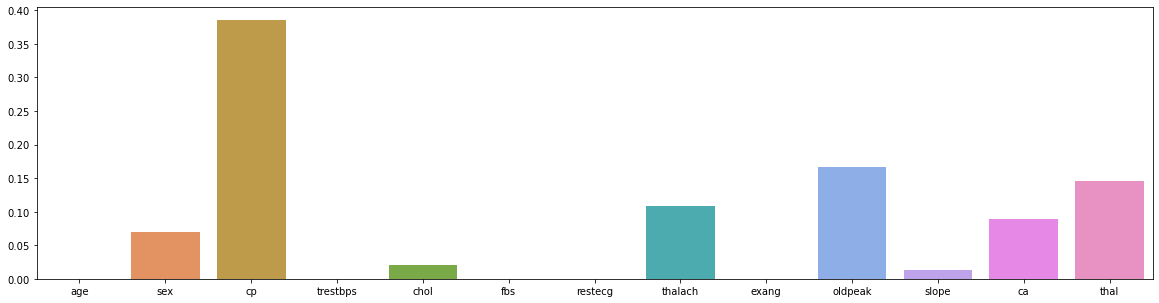

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x=x.columns,y=dt_model.feature_importances_)

# Wrapper Method (At the time of model training):
    * It uses Machine Learning Models to find to best subset of features
    1. Forward Feature Selection
    2. Backward Feature Elimination
    3. Exhaustive Feature Selection
    4. Recursive Feature Selection


In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

In [70]:
sfs=SequentialFeatureSelector(dt_model,direction='forward',n_features_to_select=5)
sfs.fit(x_train,y_train)
new=sfs.get_support()

In [71]:
new

array([False,  True,  True, False, False, False, False, False, False,
       False,  True,  True,  True])

In [73]:
sfs=SequentialFeatureSelector(model_RSCV,direction='forward',n_features_to_select=5)
sfs.fit(x_train,y_train)
new=sfs.get_support()
new

array([False, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True])

In [76]:
for index,value in enumerate(new):
    if value==True:
        name=df.columns[index]
        print(name)
    else:
        pass

cp
restecg
oldpeak
ca
thal


# Backward Feature Elimination

### Requires high computational cost

In [ ]:
sfs=SequentialFeatureSelector(dt_model,direction='backward',n_features_to_select=5)
sfs.fit(x_train,y_train)
new=sfs.get_support()